### Cluster Analysis ###

This code performs cluster analysis on distilleries based on characteristics of their whisky.

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/karelsti/Data-Analyst-Portfolio/main/python_datamining/clustering/whisky.csv'
whisky = pd.read_csv(url)
whisky.head()

,RowID,Distillery,Tobacco,Smoky,Body,Sweetness,Malty,Nutty,Medicinal,Honey,Winey,Spicy,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,0,2,2,2,2,2,0,2,2,1,2,2,\tPH15 2EB,-3.850199,56.625191
1,2,Aberlour,0,1,3,3,3,2,0,4,2,3,3,2,\tAB38 9PJ,-3.229644,57.467395
2,3,AnCnoc,0,2,1,3,2,2,0,2,0,0,3,2,\tAB5 5LI,-2.785295,57.441751
3,4,Ardbeg,0,4,4,1,2,1,4,0,0,2,1,0,\tPA42 7EB,-6.108503,55.640607
4,5,Ardmore,0,2,2,2,3,2,0,1,1,1,1,1,\tAB54 4NH,-2.743629,57.350557


### Features ###

Checking the range of values for each sensory feature. 

In [4]:
column_ranges = whisky[['Tobacco', 'Smoky', 'Body', 'Sweetness', 'Malty', 'Nutty', 
                      'Medicinal', 'Honey', 'Winey', 'Spicy', 'Fruity', 'Floral']].agg(['min', 'max'])

print("Range of numbers for each column:")
print(column_ranges)

Range of numbers for each column:
     Tobacco  Smoky  Body  Sweetness  Malty  Nutty  Medicinal  Honey  Winey  \
min        0      0     0          1      0      0          0      0      0   
max        1      4     4          4      3      4          4      4      4   

     Spicy  Fruity  Floral  
min      0       0       0  
max      3       3       4  


In [22]:
# Checking missing values
whisky.isna().sum()

RowID         0
Distillery    0
Tobacco       0
Smoky         0
Body          0
Sweetness     0
Malty         0
Nutty         0
Medicinal     0
Honey         0
Winey         0
Spicy         0
Fruity        0
Floral        0
Postcode      0
Latitude      0
Longitude     0
cluster       0
dtype: int64

In [6]:
whisky['Distillery'].nunique()
# We don't have any duplicated disttilleries

86

In [7]:
# Defining the features
features = ['Tobacco', 'Smoky', 'Body', 'Sweetness', 'Malty', 'Nutty', 'Medicinal', 'Honey', 'Winey', 'Spicy',
             'Fruity', 'Floral']
features

['Tobacco',
 'Smoky',
 'Body',
 'Sweetness',
 'Malty',
 'Nutty',
 'Medicinal',
 'Honey',
 'Winey',
 'Spicy',
 'Fruity',
 'Floral']

### Standardizing the Data ###

We need to transform the features so that they have a mean of 0 and standard deviation of 1. This is necessary for the KMeans algorithm. 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
whisky_scaled = scaler.fit_transform(whisky[features])
print(whisky_scaled)

[[-0.36273813  0.54172898 -0.07542547 ... -0.4918803   0.25509887
   0.35566418]
 [-0.36273813 -0.62298833  1.00567291 ...  2.07185947  1.54559904
   0.35566418]
 [-0.36273813  0.54172898 -1.15652385 ... -1.77375019  1.54559904
   0.35566418]
 ...
 [-0.36273813 -0.62298833 -2.23762223 ...  0.78998958 -1.0354013
   0.35566418]
 [-0.36273813 -0.62298833 -0.07542547 ... -1.77375019 -2.32590146
  -1.99719114]
 [ 2.75680975 -1.78770563 -0.07542547 ...  0.78998958  0.25509887
  -0.82076348]]


In [11]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


### The Elbow Method ###

The resulting graph will help us determine the uptimal number of clusters, it helps in identifying the point where adding more clusters does not significantly improve the fit of the model.

Elbow Method:


C:\Users\karel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

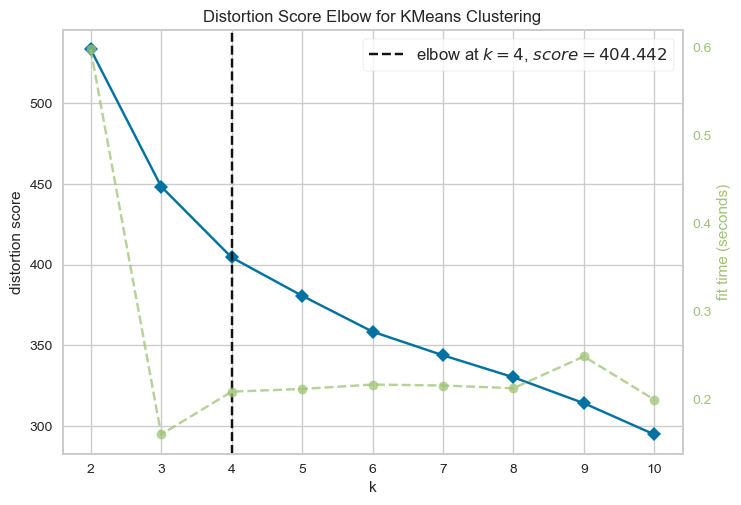

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(whisky[features])
Elbow_M.show()

### Dendogram ###

Visualization of hierarchical clustering.

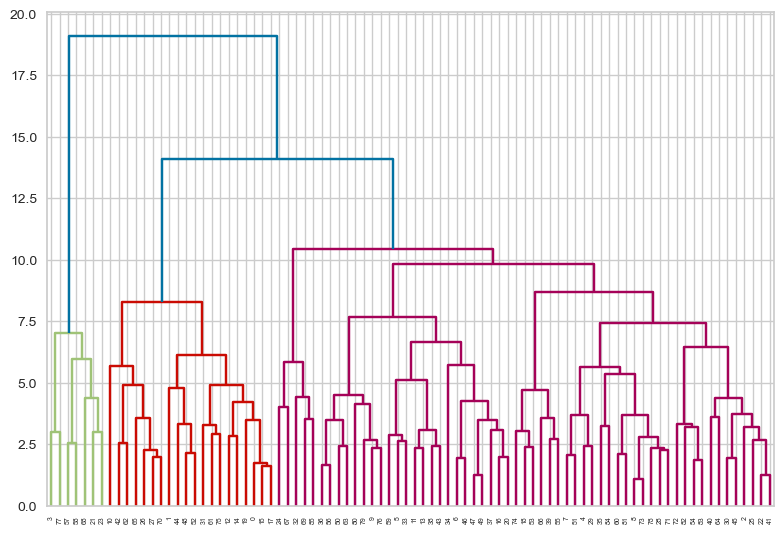

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_data = linkage(whisky_scaled, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [14]:
# The data is clustered into 4 clusters using KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
whisky['cluster'] = kmeans.fit_predict(whisky_scaled)

C:\Users\karel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
# Showing sample distilleries from each cluster
samples = whisky.groupby('cluster').head()
print("\nSamples from each cluster:")
print(samples[['Distillery', 'cluster']])


Samples from each cluster:
       Distillery  cluster
0       Aberfeldy        0
1        Aberlour        0
2          AnCnoc        2
3          Ardbeg        1
4         Ardmore        0
5     ArranIsleOf        2
6    Auchentoshan        2
7       Auchroisk        0
8        Aultmore        2
9        Balblair        3
10      Balmenach        0
13       Benriach        2
18        Bowmore        3
19  Bruichladdich        3
21       Caol Ila        1
23      Clynelish        1
34    GlenGarioch        3
39     GlenScotia        3
57      Lagavulin        1
58       Laphroig        1


### Radar plot ###

Visualizing the average values of each feature for all clusters.

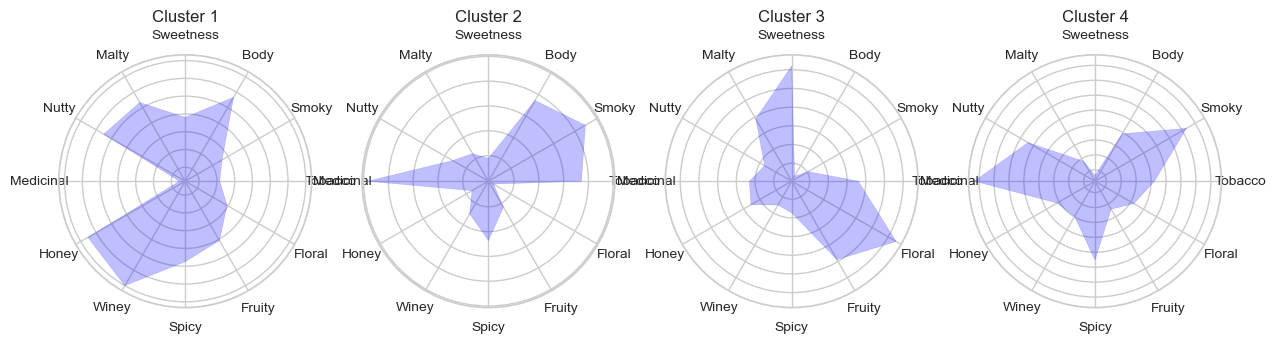

In [19]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cluster_centers = kmeans.cluster_centers_ # the centroids of each cluster obtained from the k-means clustering algorithm
cluster_labels_whisky = kmeans.labels_ # cluster labels assigned to each data point by the k-means algorithm

fig, axes = plt.subplots(1, k, subplot_kw=dict(polar=True), figsize=(15, 5))

for i, ax in enumerate(axes.flatten()):
    values = cluster_centers[i]
    categories = features
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values = np.concatenate((values,[values[0]]))
    angles += angles[:1]
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f'Cluster {i+1}')

plt.show()

In [20]:
# Displaying all clusters and their distilleries 
for cluster_label in range(k):
    cluster_distilleries = whisky[whisky['cluster'] == cluster_label]['Distillery']
    
    print(f"Cluster {cluster_label}:")
    
    for distillery in cluster_distilleries:
        print(f"  - {distillery}")
    
    print()

Cluster 0:
  - Aberfeldy
  - Aberlour
  - Ardmore
  - Auchroisk
  - Balmenach
  - Belvenie
  - BenNevis
  - Benrinnes
  - Benromach
  - BlairAthol
  - Craigallechie
  - Dailuaine
  - Dalmore
  - Deanston
  - Edradour
  - GlenKeith
  - GlenOrd
  - Glendronach
  - Glendullan
  - Glenfarclas
  - Glenlivet
  - Glenrothes
  - Glenturret
  - Knochando
  - Longmorn
  - Macallan
  - Mortlach
  - OldFettercairn
  - RoyalLochnagar
  - Scapa
  - Strathisla
  - Tomatin

Cluster 1:
  - Ardbeg
  - Caol Ila
  - Clynelish
  - Lagavulin
  - Laphroig
  - Talisker

Cluster 2:
  - AnCnoc
  - ArranIsleOf
  - Auchentoshan
  - Aultmore
  - Benriach
  - Bladnoch
  - Bunnahabhain
  - Cardhu
  - Craigganmore
  - Dalwhinnie
  - Dufftown
  - GlenDeveronMacduff
  - GlenElgin
  - GlenGrant
  - GlenMoray
  - GlenSpey
  - Glenallachie
  - Glenfiddich
  - Glengoyne
  - Glenkinchie
  - Glenlossie
  - Inchgower
  - Linkwood
  - Miltonduff
  - RoyalBrackla
  - Speyburn
  - Speyside
  - Strathmill
  - Tamdhu
  - Tamnavuli

In [21]:
cluster_centers_df = whisky.groupby('cluster')[['Tobacco', 'Smoky', 'Body', 'Sweetness', 'Malty', 'Nutty', 
                                              'Medicinal', 'Honey', 'Winey', 'Spicy', 'Fruity', 'Floral']].mean()
cluster_centers_df

,Tobacco,Smoky,Body,Sweetness,Malty,Nutty,Medicinal,Honey,Winey,Spicy,Fruity,Floral
cluster,,,,,,,,,,,,
0,0.062500,1.468750,2.562500,2.406250,2.093750,1.875000,0.062500,1.843750,1.718750,1.656250,1.968750,1.687500
1,0.666667,3.666667,3.666667,1.500000,1.333333,1.166667,3.333333,0.166667,0.500000,1.666667,1.166667,0.166667
2,0.090909,1.030303,1.393939,2.606061,1.787879,1.090909,0.212121,1.000000,0.515152,1.030303,1.939394,2.121212
3,0.066667,1.933333,1.866667,1.666667,1.400000,1.533333,1.200000,0.933333,0.600000,1.466667,1.400000,1.400000


### Summary ###

- **Cluster 0**: Slightly sweet and malty whiskies  
- **Cluster 1**: Smoky whiskies with full body and medicinal flavors  
- **Cluster 2**: Light whiskies with floral and fruity flavor  
- **Cluster 3**: Smoky whiskies with a mixture of sweetness and spiciness 